# Monthly Electricity Statistics

## Cargue Dataset

In [1]:
# importar liberarias

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Se carga el DataFrame y se muestra la informacion de las columnas
df = pd.read_csv("data.csv")

## Exploración inicial

In [4]:
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.73,1,"16,471.89",NaN,0.05
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.47,2,"4,940.91",NaN,0.02
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.22,3,908.24,NaN,0.00
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.08,4,1.00,NaN,0.00
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,"19,289.73",7,"214,302.97",NaN,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,"292,417.55",23,"3,355,041.79","3,320,634.08",0.79
181911,United States,DEC2022,December 2022,2022,12,December,Others,"8,017.84",24,"53,936.06","48,994.52",0.02
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,"6,133.27",25,"71,009.97","72,421.58",0.02
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,"146,425.47",26,"1,749,804.65","1,670,530.53",0.40


In [5]:
df.shape # Muestra el numero de registros y colomnas de un dataset

(181915, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


## Tratamiento de duplicados

In [7]:
df.drop_duplicates() # permite eliminar las filas o registros duplicados en un dataset

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.73,1,"16,471.89",NaN,0.05
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.47,2,"4,940.91",NaN,0.02
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.22,3,908.24,NaN,0.00
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.08,4,1.00,NaN,0.00
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,"19,289.73",7,"214,302.97",NaN,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,"292,417.55",23,"3,355,041.79","3,320,634.08",0.79
181911,United States,DEC2022,December 2022,2022,12,December,Others,"8,017.84",24,"53,936.06","48,994.52",0.02
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,"6,133.27",25,"71,009.97","72,421.58",0.02
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,"146,425.47",26,"1,749,804.65","1,670,530.53",0.40


In [8]:
df.shape

(181915, 12)

## Tratamiento de valores nulos

In [9]:
# Eliminar filas que contienen al menos un valor nulo
df_sin_nulos = df.dropna()

df_sin_nulos.shape

(164810, 12)

In [10]:
# Reemplazar valores por la media
# Revisar viavilidad ya que en este caso la media de la energia del año anterior podria no ser fiel, debido
# a que la media se aplica por todos los tipos de energia en el DataSet

# Calculamos la media de la columna ignorando los NaN
mean_value = df['previousYearToDate'].mean()

# Reemplazamos los NaN con la media calculada
df['previousYearToDate'].fillna(mean_value, inplace=True)

## Codificar campos relevantes

In [11]:
# Codificamos los países asignando un número a cada uno
df['Codigo_pais'] = df['COUNTRY'].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  181915 non-null  float64
 11  share               181915 non-null  float64
 12  Codigo_pais         181915 non-null  int8   
dtypes: float64(4), int64(3), int8(1), object(5)
memory usage: 16.8+ MB


In [12]:
#Filtrar por Latinoamerica

# Analizar 3 tipos de energia

In [13]:
## Countries:
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Costa Rica', 'Spain']
#Brazil
#df_filtrado = df['COUNTRY'].isin(paises)

df_filtrado = df[df['COUNTRY'].isin(paises)]

df_filtrado

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share,Codigo_pais
96,Chile,JAN2010,January 2010,2010,1,January,Hydro,"2,277.81",1,"21,641.00","138,208.27",0.48,7
97,Chile,JAN2010,January 2010,2010,1,January,Wind,21.13,2,332.00,"138,208.27",0.00,7
98,Chile,JAN2010,January 2010,2010,1,January,Total combustible fuels,"2,472.14",7,"36,249.00","138,208.27",0.52,7
99,Chile,JAN2010,January 2010,2010,1,January,Coal,"1,287.31",8,"15,974.07","138,208.27",0.27,7
100,Chile,JAN2010,January 2010,2010,1,January,Oil,382.03,9,"8,022.08","138,208.27",0.08,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181812,Spain,DEC2022,December 2022,2022,12,December,Non-renewables,"12,198.33",23,"161,516.70","137,549.57",0.54,47
181813,Spain,DEC2022,December 2022,2022,12,December,Others,896.02,24,"10,695.55","11,161.27",0.04,47
181814,Spain,DEC2022,December 2022,2022,12,December,Other renewables aggregated,470.36,25,"6,621.29","6,384.41",0.02,47
181815,Spain,DEC2022,December 2022,2022,12,December,Low carbon,"15,669.29",26,"178,494.60","179,706.86",0.69,47


In [14]:
## energias:
product = ['Hydro', 'Wind', 'Solar', 'Nuclear']

df_filtrado = df_filtrado[df_filtrado['PRODUCT'].isin(product)]

df_filtrado

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share,Codigo_pais
96,Chile,JAN2010,January 2010,2010,1,January,Hydro,"2,277.81",1,"21,641.00","138,208.27",0.48,7
97,Chile,JAN2010,January 2010,2010,1,January,Wind,21.13,2,332.00,"138,208.27",0.00,7
507,Mexico,JAN2010,January 2010,2010,1,January,Hydro,"1,348.32",1,"36,790.00","138,208.27",0.07,31
508,Mexico,JAN2010,January 2010,2010,1,January,Wind,103.06,2,"1,236.72","138,208.27",0.01,31
509,Mexico,JAN2010,January 2010,2010,1,January,Solar,2.53,3,31.00,"138,208.27",0.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181434,Mexico,DEC2022,December 2022,2022,12,December,Nuclear,"1,139.94",6,"10,401.09","11,432.55",0.05,31
181791,Spain,DEC2022,December 2022,2022,12,December,Hydro,"3,234.90",1,"21,641.77","32,367.29",0.14,47
181792,Spain,DEC2022,December 2022,2022,12,December,Wind,"5,575.43",2,"61,174.63","60,832.99",0.25,47
181793,Spain,DEC2022,December 2022,2022,12,December,Solar,"1,205.88",3,"32,816.27","25,937.97",0.05,47


In [15]:
temp = df_filtrado[df_filtrado['YEAR'] >= 2018]

temp

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share,Codigo_pais
101708,Argentina,JAN2018,January 2018,2018,1,January,Hydro,"2,825.50",1,"31,865.78","2,710.08",0.22,0
101709,Argentina,JAN2018,January 2018,2018,1,January,Wind,55.75,2,"1,402.54",55.79,0.00,0
101710,Argentina,JAN2018,January 2018,2018,1,January,Solar,1.61,3,107.51,1.52,0.00,0
101713,Argentina,JAN2018,January 2018,2018,1,January,Nuclear,644.69,6,"6,514.31",643.31,0.05,0
101897,Chile,JAN2018,January 2018,2018,1,January,Hydro,"2,021.67",1,"22,899.12","1,892.68",0.29,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181434,Mexico,DEC2022,December 2022,2022,12,December,Nuclear,"1,139.94",6,"10,401.09","11,432.55",0.05,31
181791,Spain,DEC2022,December 2022,2022,12,December,Hydro,"3,234.90",1,"21,641.77","32,367.29",0.14,47
181792,Spain,DEC2022,December 2022,2022,12,December,Wind,"5,575.43",2,"61,174.63","60,832.99",0.25,47
181793,Spain,DEC2022,December 2022,2022,12,December,Solar,"1,205.88",3,"32,816.27","25,937.97",0.05,47


In [16]:
df_group_pais = temp.groupby(['COUNTRY', 'PRODUCT'])['VALUE'].sum().unstack(fill_value=0)

df_group_pais

PRODUCT,Hydro,Nuclear,Solar,Wind
COUNTRY,,,,
Argentina,"130,979.51","42,281.45","7,313.37","42,503.46"
Chile,"107,329.24",0.00,"43,865.62","30,746.95"
Colombia,"280,557.86",0.00,"1,146.46",241.33
Costa Rica,"18,550.75",0.00,155.60,"2,942.56"
Mexico,"152,359.50","56,897.99","45,467.30","90,503.17"
Spain,"150,003.07","274,838.84","105,529.24","281,017.62"


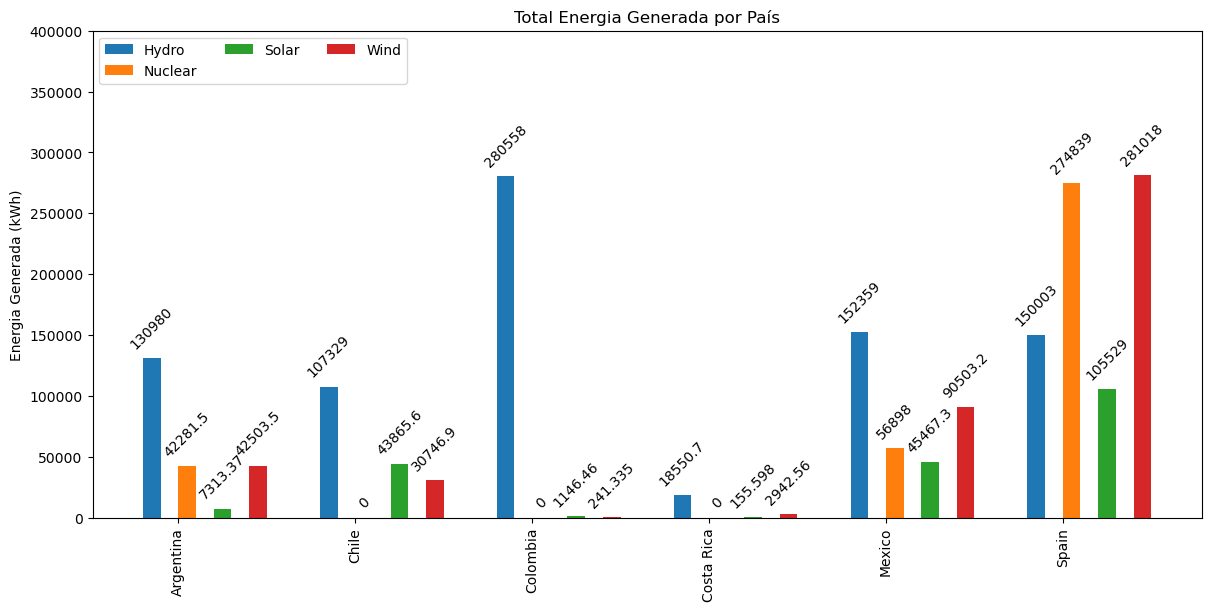

In [48]:
# Asegúrate de que df_group_pais es un DataFrame de pandas
# x = np.arange(len(df_group_pais))  # las ubicaciones de las etiquetas
# width = 0.25  # el ancho de las barras
width = 0.1
x = np.arange(len(df_group_pais))  # Las posiciones de las etiquetas en el eje X
gap = 0.1  # Espacio entre las barras
fig, ax = plt.subplots(layout='constrained',figsize=(12, 6))

# Inicializamos un offset de posición
multiplier = 0

# Recorrer las columnas del DataFrame
for attribute, measurement in df_group_pais.items():
    offset = (width + gap) * multiplier  # Calculamos el desplazamiento
    rects = ax.bar(x + offset, measurement, width, label=attribute)  # Barras
    ax.bar_label(rects, padding=5,rotation=45)  # Etiquetas encima de las barras
    multiplier += 1  # Incrementamos el desplazamiento para la siguiente barra

# Agregamos etiquetas, título y leyenda
ax.set_ylabel('Energia Generada (kWh)')
ax.set_title('Total Energia Generada por País')
ax.set_xticks(x + width * (len(df_group_pais.columns) - 1) / 2)  # Ajustar las posiciones del eje X
ax.set_xticklabels(df_group_pais.index, rotation=90)  # Si tienes un índice en df_group_pais que representa los países
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 400000)  # Establecer los límites del eje Y

# Rotar las etiquetas del eje X a vertical
#plt.xticks(rotation=90)  # Rotar las etiquetas a 90 grados (vertical)


plt.show()

## Graficos

### Mapa de Calor

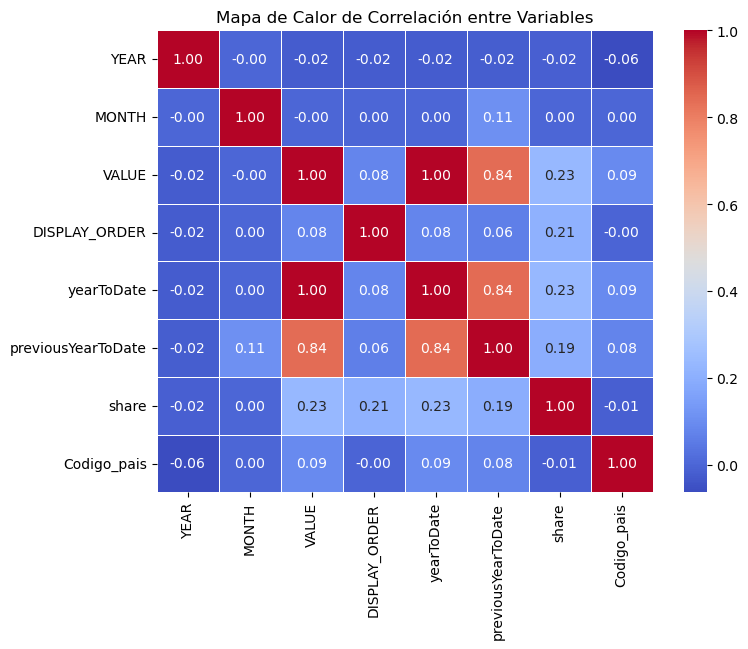

In [18]:
# Calcular la matriz de correlación
corr = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Agregar título y mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

In [19]:
df_filtrado = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Solar') & (df['YEAR'] == 2020) & ((df['MONTH'] == 2) | (df['MONTH'] == 1)) ]


In [20]:
valueYear = df_filtrado['VALUE'].sum()
valueYear

3934.4794620000002

In [21]:
df_filtrado2021 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Hydro') & (df['YEAR'] == 2021) & ((df['MONTH'] == 2) | (df['MONTH'] == 1))]
df_filtrado2021

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share,Codigo_pais
151307,Australia,JAN2021,January 2021,2021,1,January,Hydro,"1,082.83",1,"16,328.37","1,129.64",0.05,1
152703,Australia,FEB2021,February 2021,2021,2,February,Hydro,"1,025.62",1,"16,328.37","2,233.16",0.05,1


In [22]:
valueYear2021 = df_filtrado2021['VALUE'].sum()

In [23]:
valueYear2021

2108.44202

In [24]:
valueYear

3934.4794620000002

In [25]:
valueFinal = valueYear2021 + valueYear

In [26]:
valueFinal

6042.921482

In [27]:
df_filtrado2019 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Hydro') & (df['YEAR'] == 2020)]
df_filtrado2019['VALUE'].sum()

14880.598574

In [28]:
df_filtrado2021 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Natural gas')]
df_filtrado2021

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share,Codigo_pais
7,Australia,JAN2010,January 2010,2010,1,January,Natural gas,"3,544.36",10,"45,678.58","138,208.27",0.17,1
973,Australia,FEB2010,February 2010,2010,2,February,Natural gas,"3,624.48",10,"45,678.58","138,208.27",0.19,1
1939,Australia,MAR2010,March 2010,2010,3,March,Natural gas,"3,334.40",10,"45,678.58","138,208.27",0.17,1
2904,Australia,APR2010,April 2010,2010,4,April,Natural gas,"3,392.87",10,"45,678.58","138,208.27",0.19,1
3870,Australia,MAY2010,May 2010,2010,5,May,Natural gas,"3,883.55",10,"45,678.58","138,208.27",0.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176180,Australia,AUG2022,August 2022,2022,8,August,Natural gas,"4,147.22",10,"46,024.53","30,965.04",0.18,1
177334,Australia,SEP2022,September 2022,2022,9,September,Natural gas,"3,566.21",10,"46,024.53","34,190.99",0.17,1
178488,Australia,OCT2022,October 2022,2022,10,October,Natural gas,"3,410.21",10,"46,024.53","37,417.15",0.16,1
179642,Australia,NOV2022,November 2022,2022,11,November,Natural gas,"3,043.39",10,"46,024.53","40,554.87",0.15,1
